# Indicadores de un analisis tecnico de los datos finacieron de apple

pandas_ta

*   Propósito: Librería para análisis técnico de datos financieros. Proporciona funciones para calcular indicadores como medias móviles, Bandas de Bollinger, RSI, entre otros.

yfinance


*   Biblioteca para descargar datos financieros históricos de Yahoo Finance.

Funcionalidades:
Obtener datos de precios históricos (apertura, cierre, alto, bajo, volumen).
Descargar datos para múltiples activos simultáneamente.







In [ ]:
# %% Librerías
import pandas_ta as ta
import matplotlib.pyplot as plt
import yfinance as yf

# Configurar estilo de gráficos
plt.style.use('bmh')

# Descargar datos de AAPL desde Yahoo Finance
aapl = yf.download('AAPL', '2019-01-01', '2021-05-03', group_by="ticker")#as acciones de Apple Inc desde el 1 de enero de 2019 hasta el 3 de mayo de 2021.

# Corregir el DataFrame eliminando el nivel de índice "Ticker"
aapl.columns = aapl.columns.droplevel(0)



## Media Móvil Simple (SMA)
###¿Qué es una media móvil simple (SMA)?
Una media móvil simple (SMA) calcula el precio promedio de un activo, generalmente utilizando precios de cierre, durante un período específico de días.
- Un promedio móvil simple calcula el precio promedio durante un período de tiempo específico.
-Un promedio móvil simple es un indicador técnico que puede ayudar a determinar si el precio de un activo continuará o si revertirá una tendencia alcista o bajista.
-Un promedio móvil simple se puede mejorar como un promedio móvil exponencial (EMA) que tiene mayor ponderación en la acción del precio reciente.




[*********************100%***********************]  1 of 1 completed


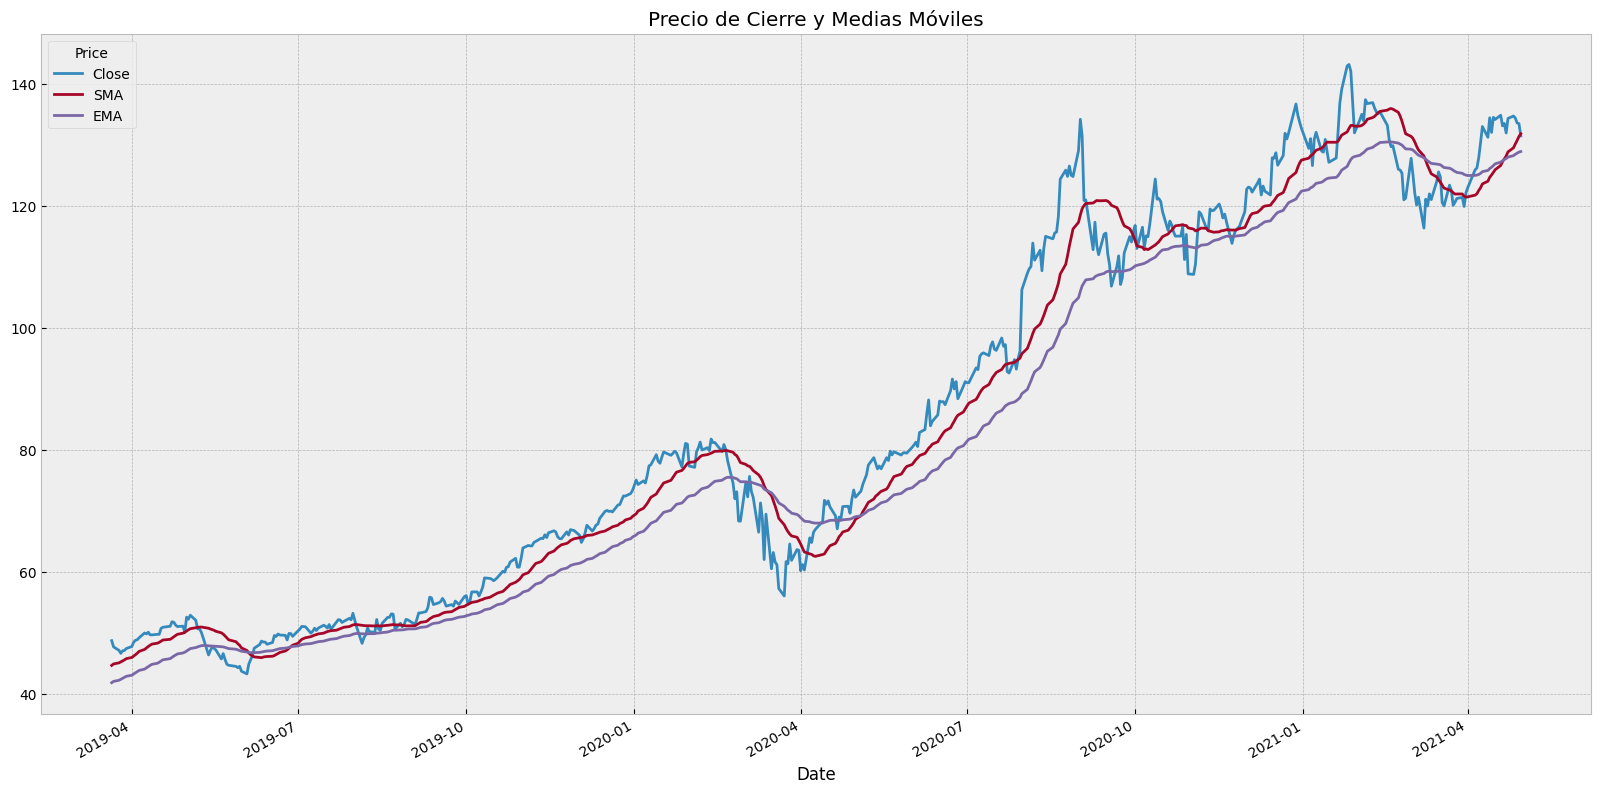

In [ ]:

# Calcular Media Móvil Simple (SMA) y Media Móvil Exponencial (EMA)
aapl['SMA'] = ta.sma(aapl['Close'], length=21)
aapl['EMA'] = ta.ema(aapl['Close'], length=55)

# Eliminar valores NaN antes de graficar
aapl.dropna(subset=['SMA', 'EMA'], inplace=True)

# Graficar precios y medias móviles
aapl[['Close', 'SMA', 'EMA']].plot(figsize=(20, 10), title="Precio de Cierre y Medias Móviles")
plt.show()


## Análisis:

Las medias móviles (SMA y EMA) siguen de cerca el precio de cierre.

*   Cruces entre el precio y las medias móviles pueden señalar posibles puntos de entrada o salida.
*   La EMA es adecuada para identificar cambios rápidos en tendencias, mientras que la SMA es mejor para confirmar.



# las bandas de Bollinger
son indicadores populares para el análisis de patrones de precios. El patrón consiste en tres líneas que se superponen con mayor frecuencia (no exclusivamente) al precio de los valores. Las bandas de Bollinger ayudan identificar el rango dentro del cual opera un activo, planteando un marco de referencia para determinar si los precios de un activo están altos o bajos en términos relativos.


*  La línea media del indicador de las bandas de Bollinger es una media móvil (normalmente) del precio (por defecto es una media móvil de 20 períodos).
*   La banda superior de Bollinger se deriva de un cálculo de la desviación estándar del precio añadido al valor medio móvil.

*   La banda inferior de Bollinger se deriva de un cálculo de la desviación estándar del precio restado del valor medio móvil.






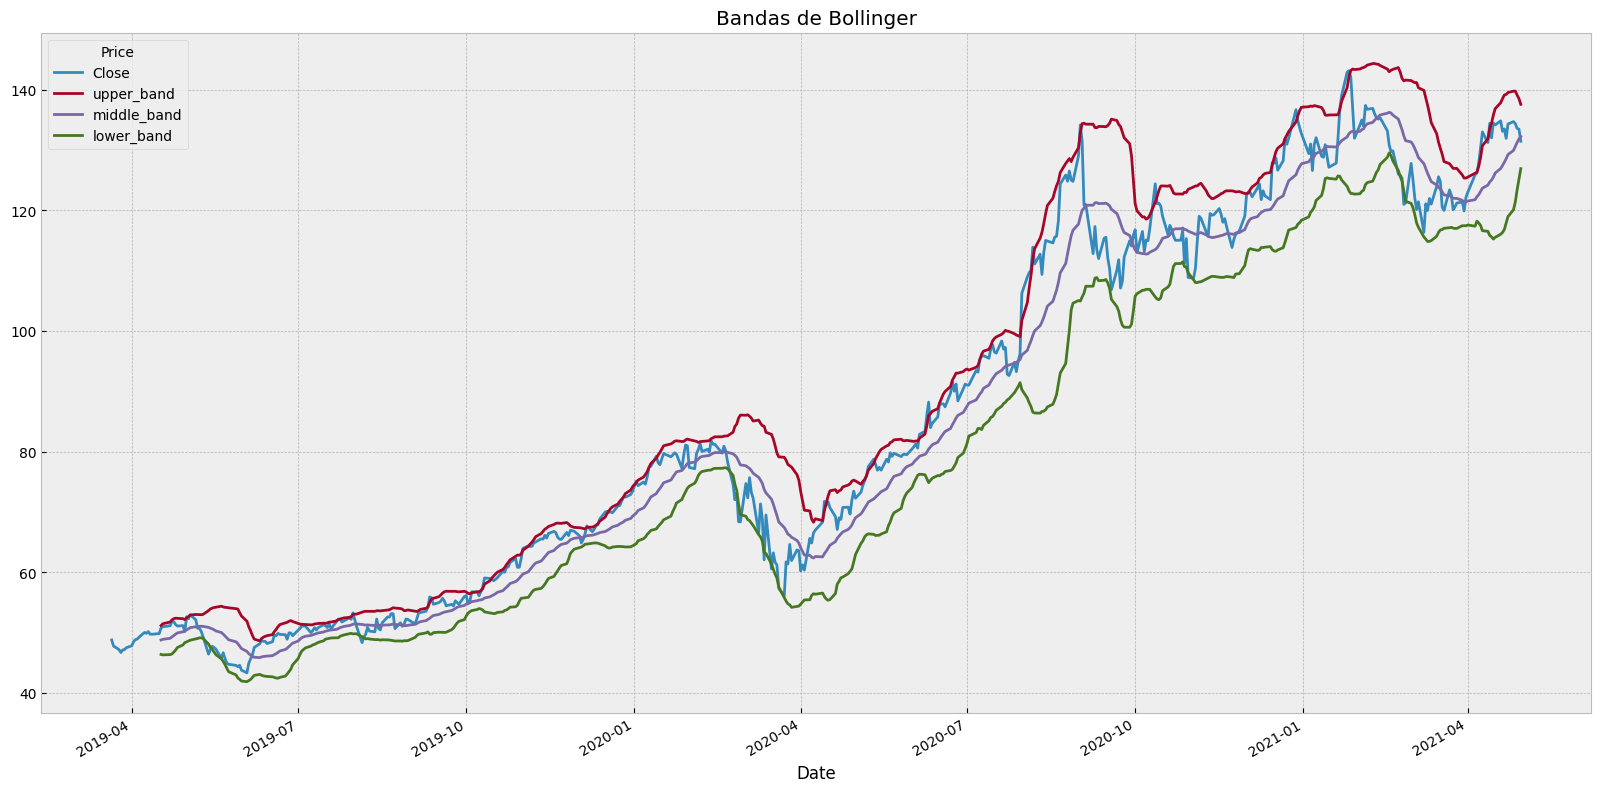

In [ ]:
# %% Bandas de Bollinger
# Calcular Bandas de Bollinger
bb = ta.bbands(aapl['Close'], length=20)
aapl['upper_band'], aapl['middle_band'], aapl['lower_band'] = bb['BBU_20_2.0'], bb['BBM_20_2.0'], bb['BBL_20_2.0']

# Graficar Bandas de Bollinger
aapl[['Close', 'upper_band', 'middle_band', 'lower_band']].plot(
    figsize=(20, 10), title="Bandas de Bollinger"
)
plt.show()

### Análisis:
El precio de cierre oscila entre las bandas superior e inferior.

*   Cuando el precio toca la banda superior, puede indicar sobrecompra (o un movimiento alcista fuerte).
*  Cuando toca la banda inferior, puede indicar sobreventa (o un movimiento bajista fuerte).

*   Movimientos hacia la banda media suelen indicar un regreso a la "normalidad" después de períodos extremos.





## Indice de Fuerza Relativa

El RSI es un indicador de tipo oscilador que refleja la fuerza relativa de los movimientos alcistas, en comparación con los movimientos bajistas, de los diferentes títulos que cotizan en los mercados bursátiles. Se calcula a partir del valor de fuerza relativa inicial (RS), que es el cociente entre la media de los cierres alcistas y la media de los cierres bajistas en un determinado periodo. Su fórmula es la siguiente:

RS = Media móvil exponencial de ‘N’ períodos alcistas / Media móvil exponencial de ‘N’ períodos bajistas (en valor absoluto)

Luego el valor del indicador RSI se obtiene indexando a 100 el dato anterior con la siguiente fórmula:

RSI = 100 – (100/1 + RS)

A partir de esta fórmula se elabora un gráfico que se muestra como una línea que varía entre 0 y 100, siendo los niveles 30 y 70 los indicadores clave para la sobreventa y la sobrecompra, respectivamente.



*   Un indicador RSI entre los 50 y los 30 puntos indica una tendencia hacia la sobreventa en el mercado, por lo que los precios podrían caer bruscamente.
*   Un indicador RSI entre los 50 y los 70 puntos marca una tendencia hacia la sobrecompra: el precio ha subido con fuerza pero es posible que el movimiento alcista se debilite.Un indicador RSI en el entorno de 50 (punto intermedio) indica que el mercado carece de tendencia.


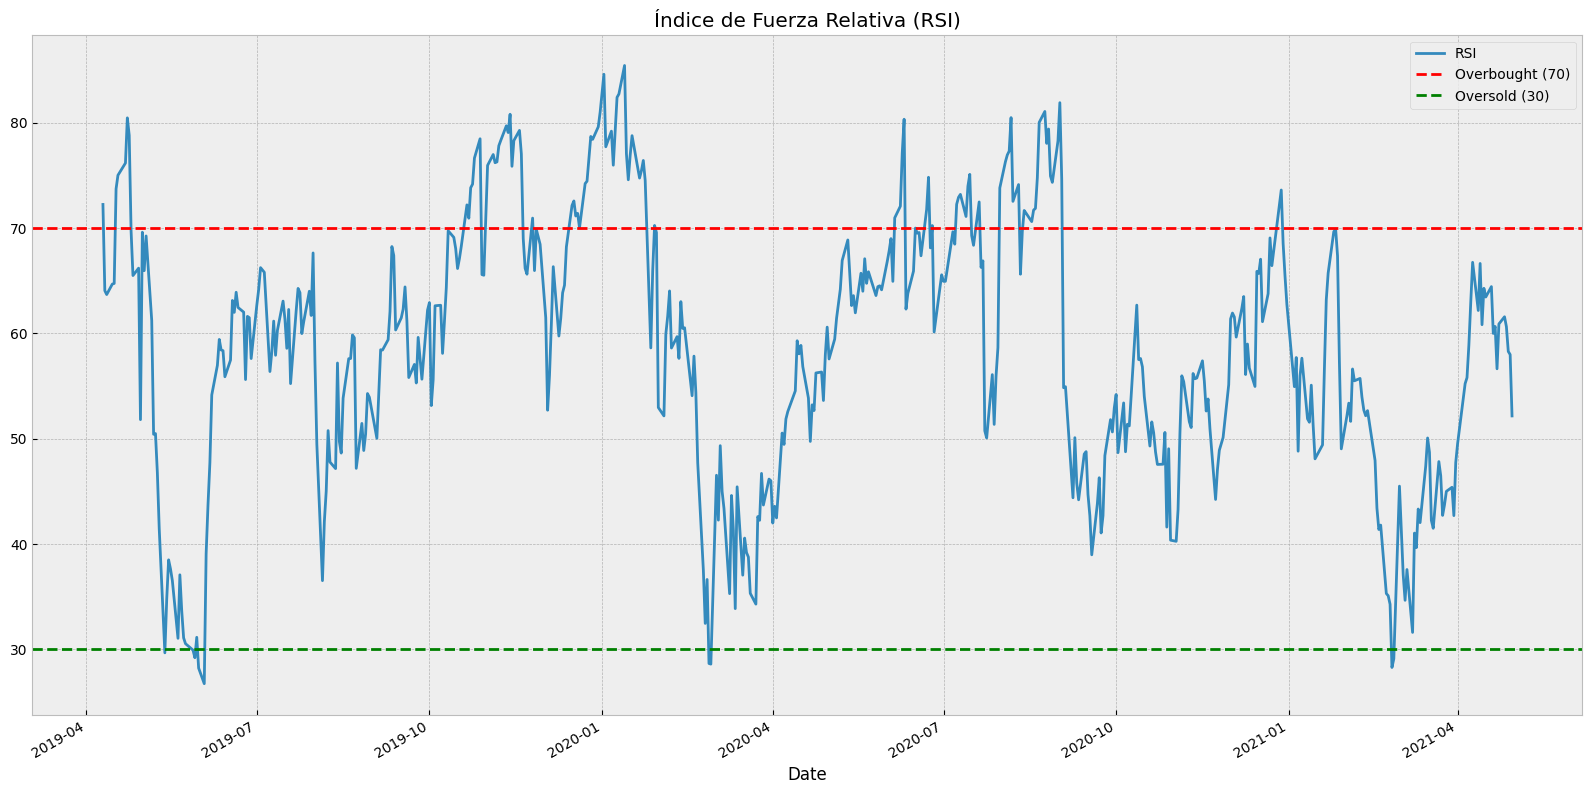

In [ ]:
# %% Índice de Fuerza Relativa (RSI)
# Calcular RSI
aapl['RSI'] = ta.rsi(aapl['Close'], length=14)

# Graficar RSI
aapl['RSI'].plot(figsize=(20, 10), title="Índice de Fuerza Relativa (RSI)")
plt.axhline(70, color='red', linestyle='--', label='Overbought (70)')
plt.axhline(30, color='green', linestyle='--', label='Oversold (30)')
plt.legend()
plt.show()

### Análisis:

Durante el periodo analizado, se observa que el RSI oscila entre 30 y 70, excepto en eventos de volatilidad alta.
*  Los puntos donde el RSI supera 70 o cae por debajo de 30 podrían ser oportunidades para analizar cambios en la dirección del precio.
*   Este gráfico es útil para validar los resultados de otros indicadores, como las Bandas de Bollinger.




 Conclusión

* Tendencia Alcista  (Confirmada por SMA y EMA).

* Posible Corrección a Corto Plazo (Bandas de Bollinger y RSI indican sobrecompra).
* Esperar un Retroceso para Comprar  (RSI cerca de 50 podría ser un buen punto de entrada).


Recomendación :

Si ya tienes acciones de Apple puedes considerar mantenerlas, ya que la tendencia sigue alcista pero si quieres comprar hay que espera una corrección cerca de la SMA (línea roja en el primer gráfico) o cuando el RSI caiga cerca de 50 y para terminar si quieres vender se recomienda que el precio sube demasiado rápido y el RSI supera 70, podrías vender parcialmente para asegurar ganancias.


# **¿Entonces que paso en el año 2021?**

luego del hacer el analisis de las fechas desde el 1 de enero de 2019 hasta el 3 de mayo de 2021. sucedireon estas cosa :


*  El precio de las acciones Apple en noviembre de 2021 superan los $3.300.

*  Si bien ha tenido altibajos durante el último trimestre, se mantiene con valores considerablemente altos.

* Uno de los picos más altos fue a principios de noviembre cuando superó los $3.400.

 Como se recomendo las acciones de apple subieron en noviembre(buena fecha para vender) con la fecha mas alsita aunque hubo bajones se recomendo tambien compra en cuanto el RSI caiga en un 50 y vender cuando el RSI supero los 70 por lo tanto fue un buen años para invertir en Apple .




pagina donde se puede observar como le fue apple es el años 2021

https://libertex.org/es/blog/evolucion-de-las-acciones-aapl#:~:text=El%20precio%20de%20las%20acciones,noviembre%20cuando%20super%C3%B3%20los%20%243.400.